In [1]:
import matplotlib as mpl
# COLOR = 'white'
# mpl.rcParams['text.color'] = COLOR
# mpl.rcParams['axes.labelcolor'] = COLOR
# mpl.rcParams['xtick.color'] = COLOR
# mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['figure.dpi'] = 100


# import fancyimpute as fi
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import variation
from math import isnan

from scipy.cluster.hierarchy import dendrogram,linkage

import sys
sys.path.append("../src/")
import lumberjack
import tree_reader as tr

import sklearn

In [ ]:
## This notebook compares different pre-processing pipelines for working with UMIs.

## We will examine the effects of Log-Transform, PCA, GLM-PCA, 
## centering, pseudo-deconvolution and imputation-esque techniques

## Left slightly generic to accomodate different datasets, as we'd like to compare Citeseq to Nesterowa etc

In [6]:
raw_umis = np.loadtxt('./citeseq_cbmc_umis.tsv')
header = np.loadtxt('./citeseq_cbmc_header.txt',dtype=str)

In [8]:
## Here we will consider different interpretations of what constitutes "counts"

## The most trivial and common interpretation is to MLE infer frequency per million based on values
## Sounds fancy, but it's really just simple scaling. Usually followed by a log transform.

from sklearn.preprocessing import scale

counts = scale(raw_umis,with_mean=False)
log_counts = np.log10(counts)

/home/bbrener1/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


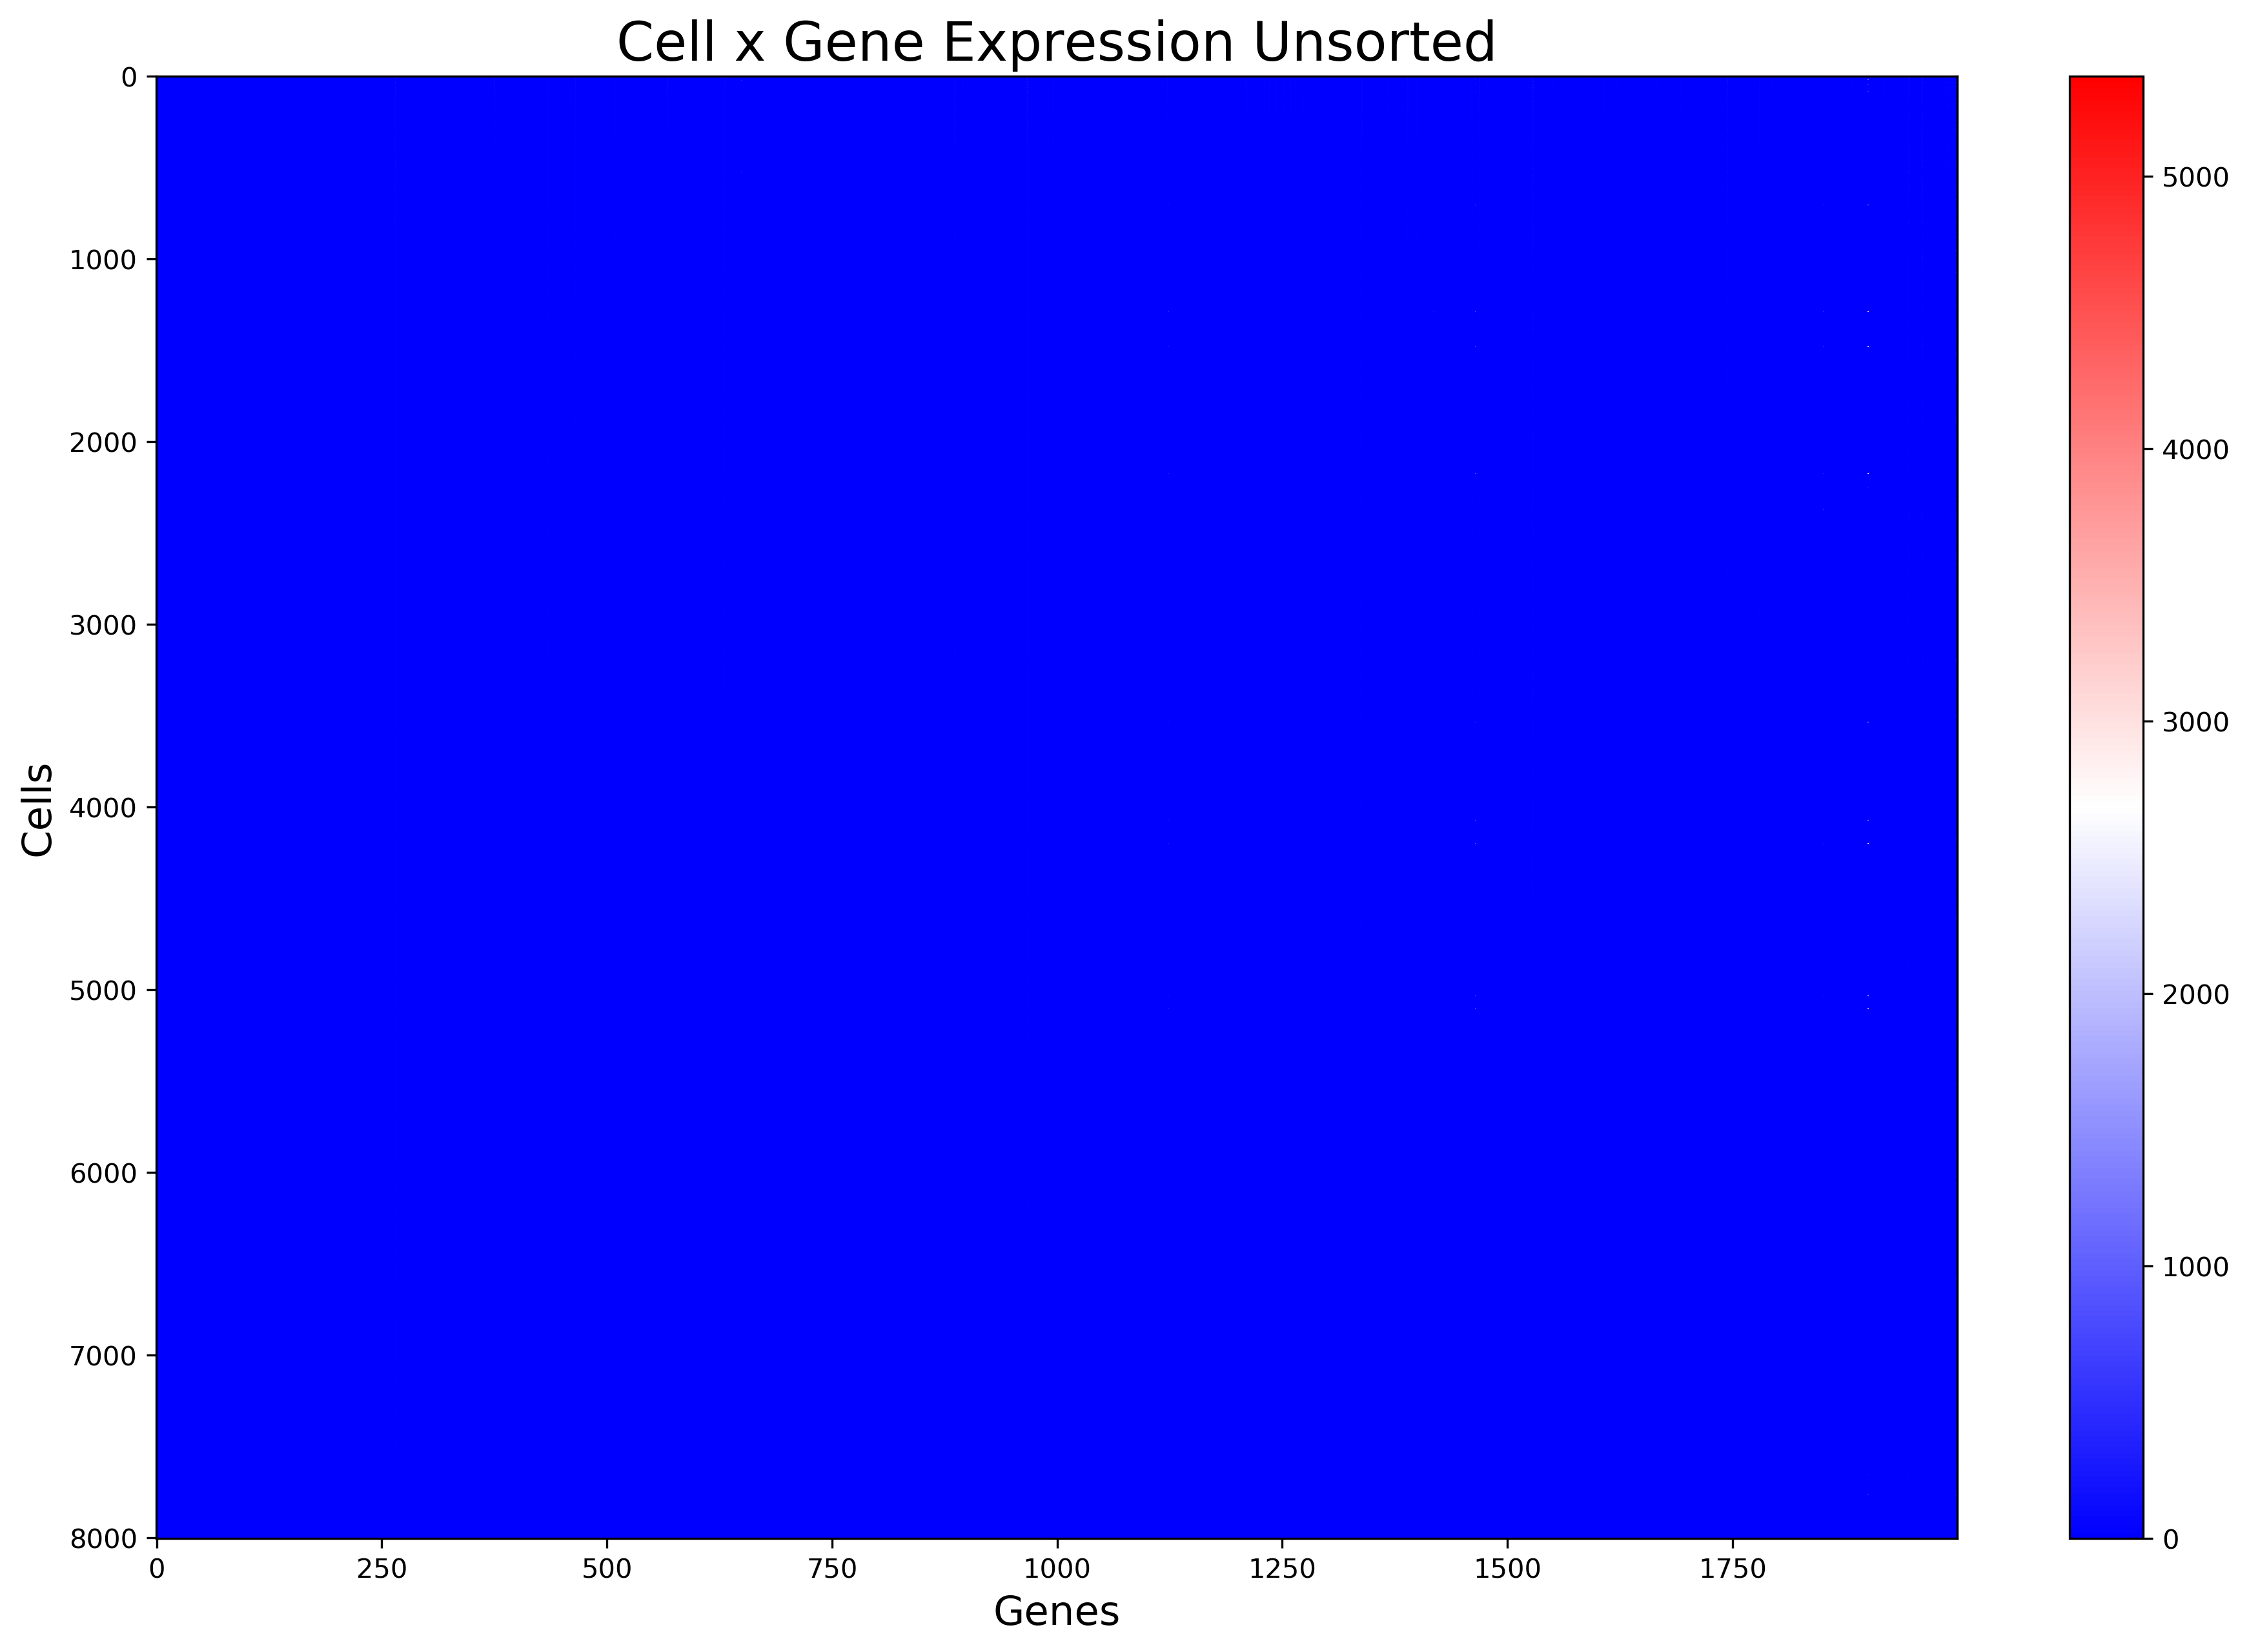

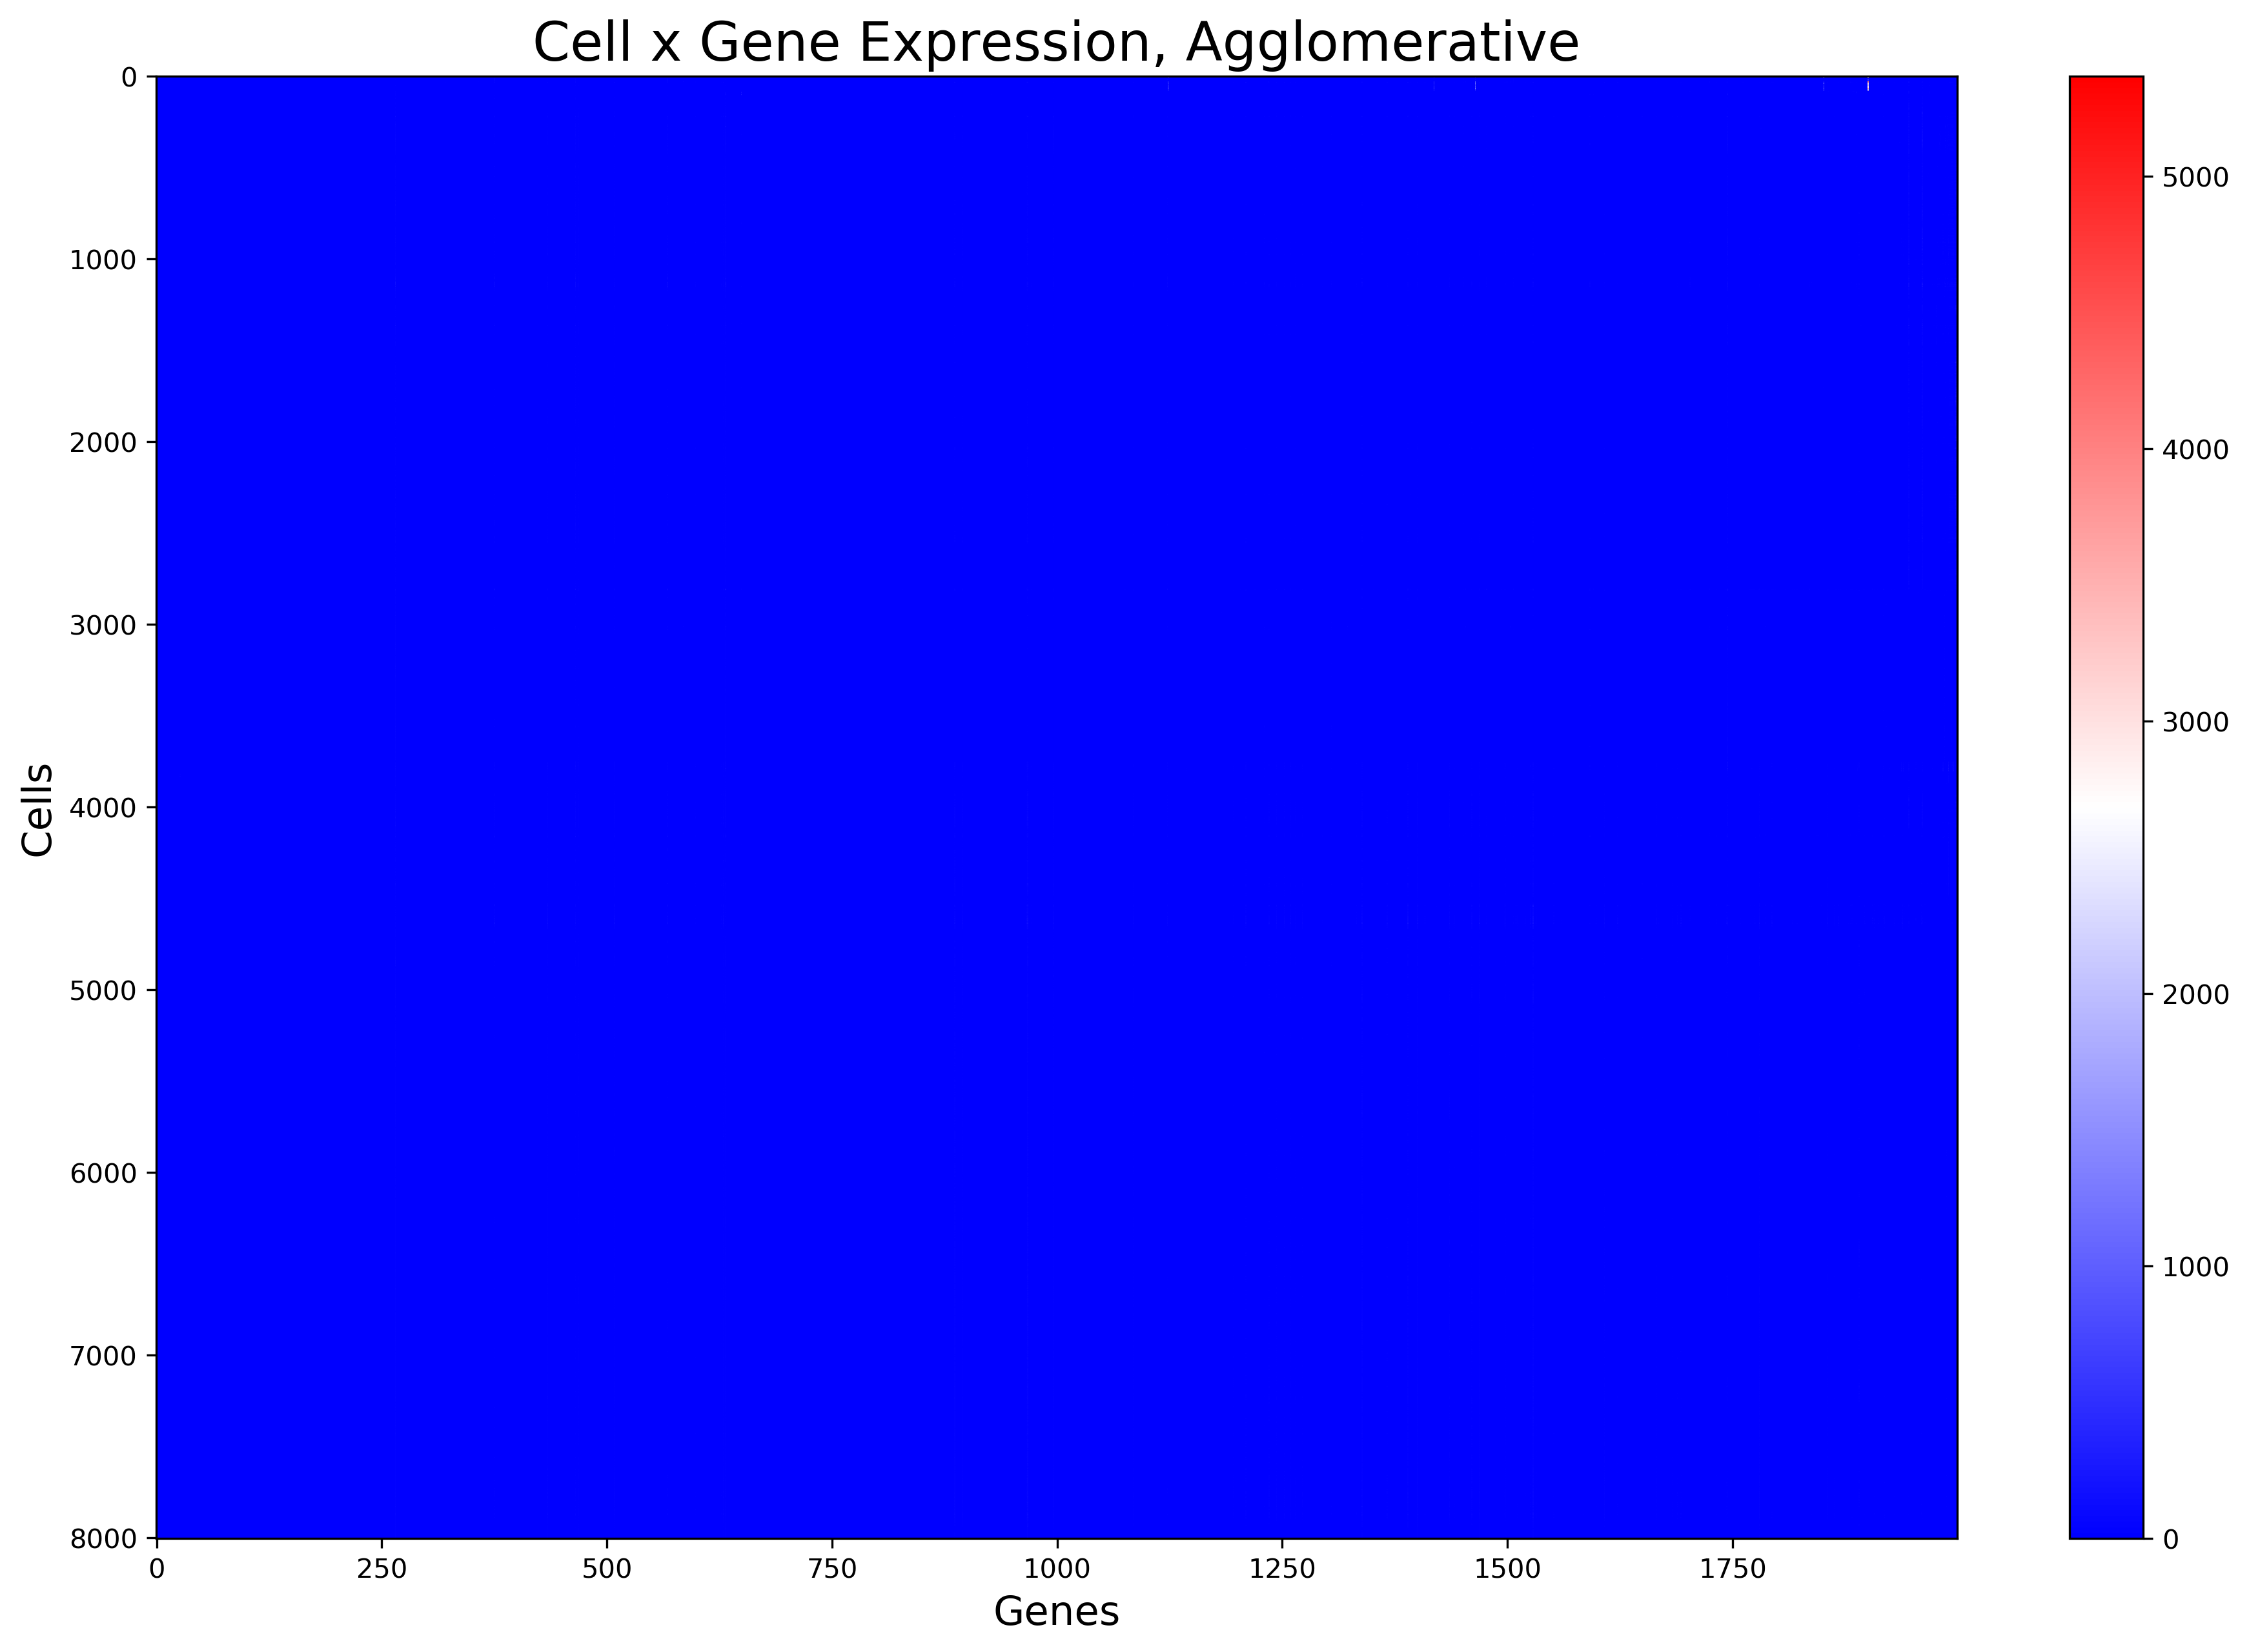

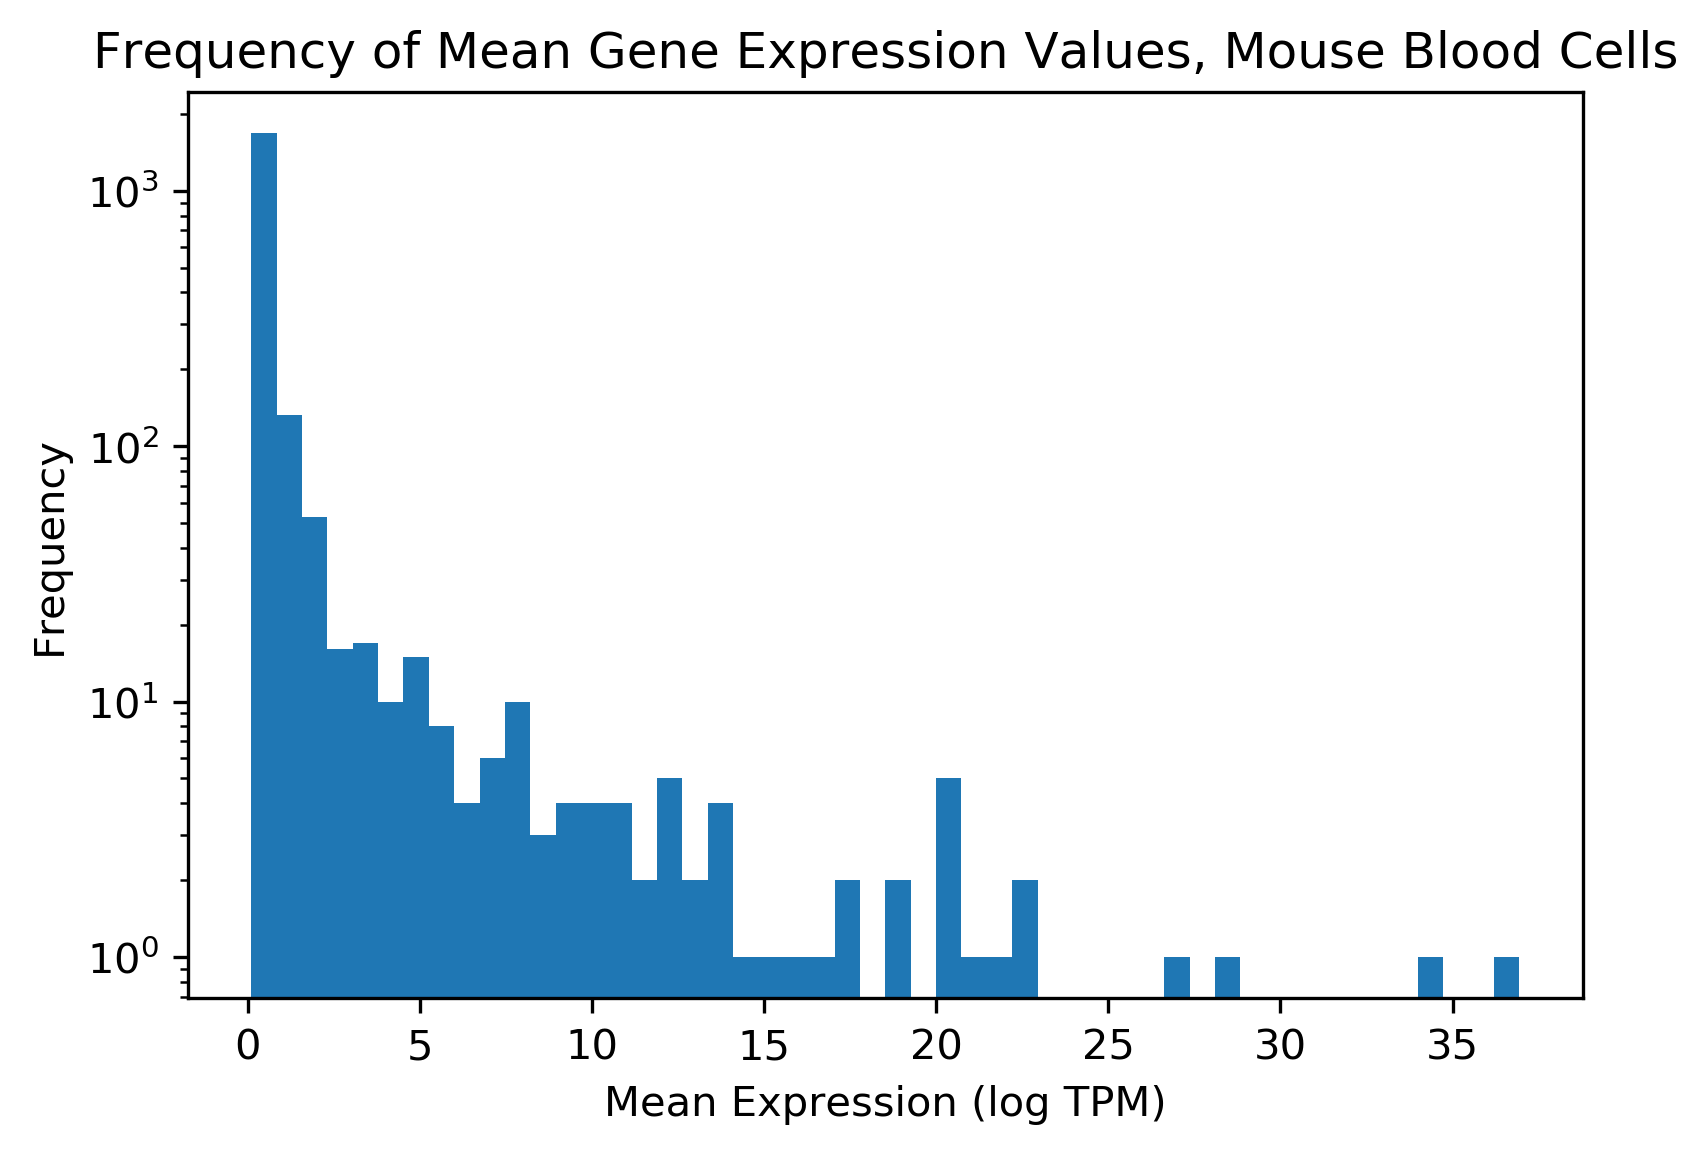

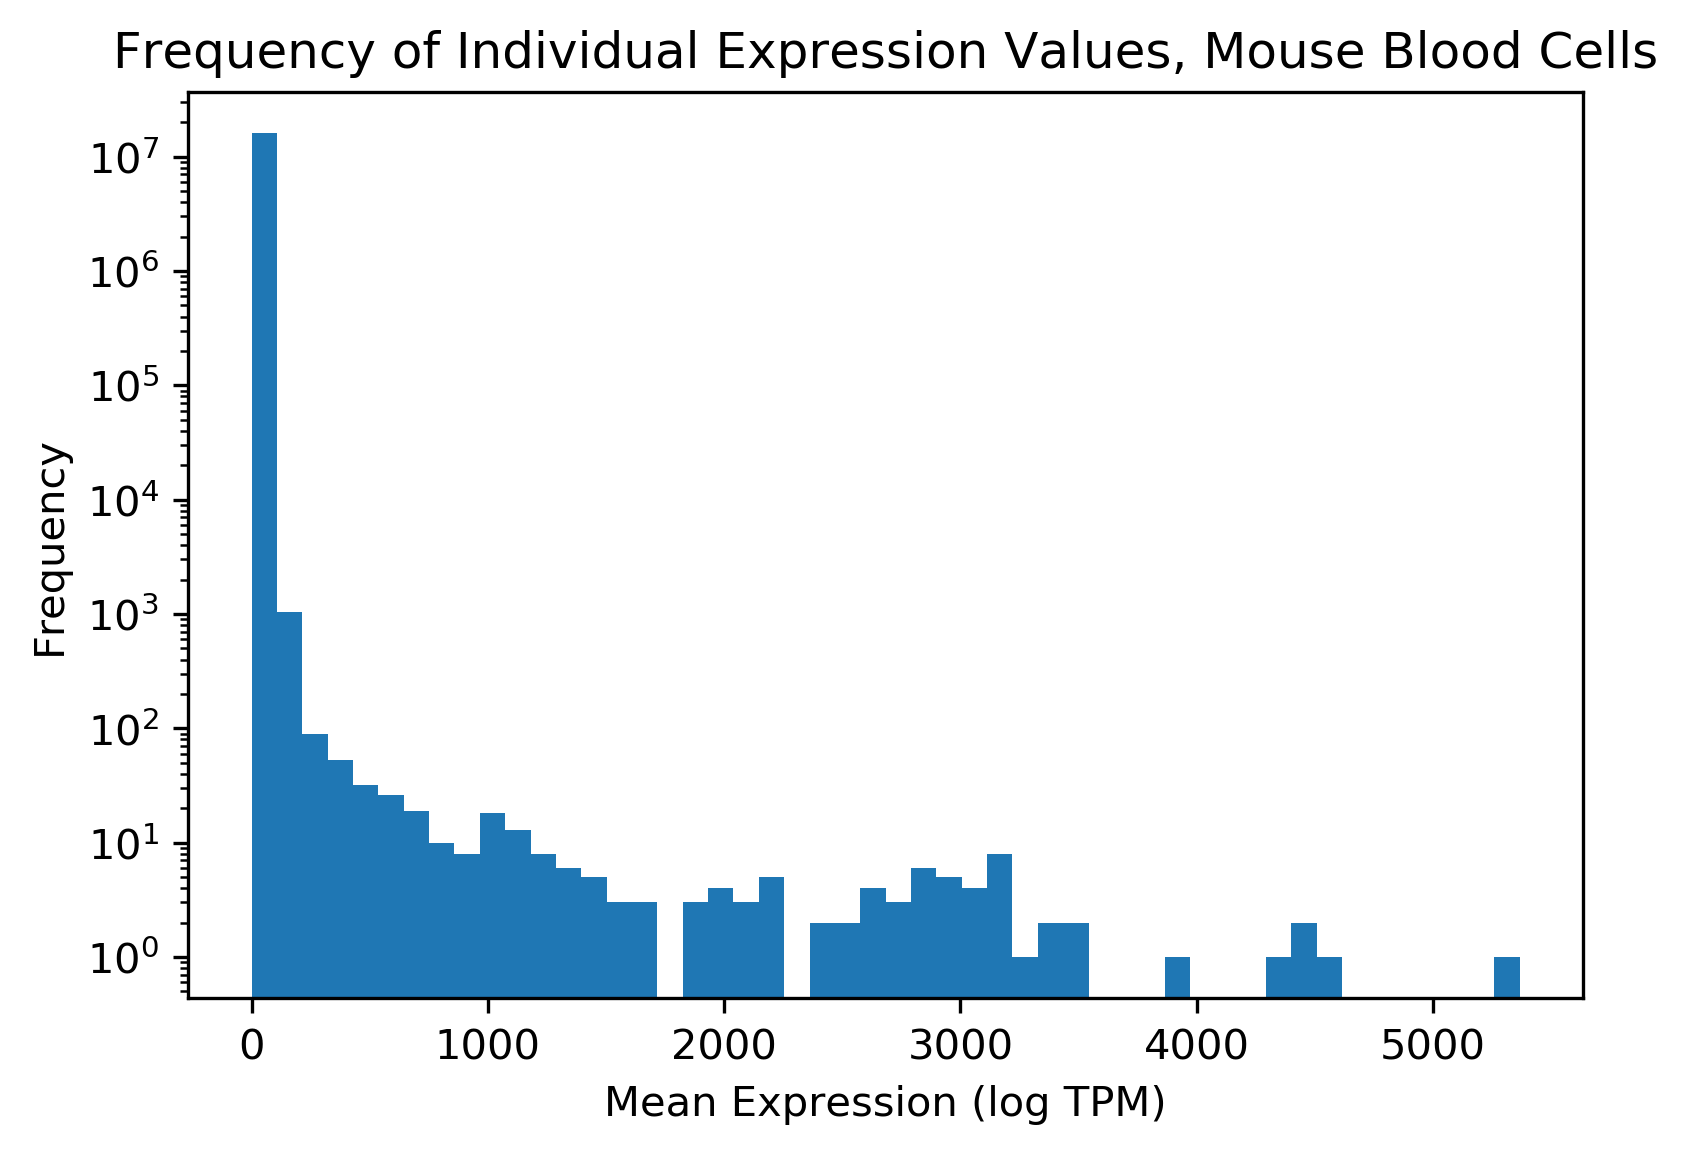

(2000,)
(2000, 2000)


In [9]:
## Let's examine the overall data first

target = raw_umis

feature_sort = dendrogram(linkage(target.T,metric='correlation',method='average'),no_plot=True)['leaves']
cell_sort = dendrogram(linkage(target,metric='cos',method='average'),no_plot=True)['leaves']

counts = target[cell_sort].T[feature_sort].T
counts = target.T[feature_sort].T
header = target[feature_sort]

plt.figure(figsize=(15,10))
plt.title("Cell x Gene Expression Unsorted",fontsize=20)
plt.imshow(target,aspect='auto',cmap="bwr")
plt.xlabel("Genes",fontsize=15)
plt.ylabel("Cells",fontsize=15)
plt.colorbar()
plt.show()


plt.figure(figsize=(15,10))
plt.title("Cell x Gene Expression, Agglomerative",fontsize=20)
plt.imshow(target[cell_sort],aspect='auto',cmap="bwr")
plt.xlabel("Genes",fontsize=15)
plt.ylabel("Cells",fontsize=15)
plt.colorbar()
plt.show()

plt.figure()
plt.title("Frequency of Mean Gene Expression Values, Mouse Blood Cells")
plt.xlabel("Mean Expression (log TPM)")
plt.ylabel("Frequency")
plt.hist(np.mean(target,axis=0),bins=50,log=True)
plt.show()

plt.figure()
plt.title("Frequency of Individual Expression Values, Mouse Blood Cells")
plt.xlabel("Mean Expression (log TPM)")
plt.ylabel("Frequency")
plt.hist(target.flatten(),bins=50,log=True)
plt.show()


print(np.mean(target,axis=0).shape)
print(header.shape)

In [ ]:
## Notes: 

In [ ]:
## To do cluster histograms of features